# SVM in Python
#### This is a practice of what's on https://youtu.be/8A7L0GsBiLQ
#### Data is from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [29]:
# Read data
import pandas as pd
import numpy as np

Data = pd.read_csv('default_of_credit_card_clients.csv', header=1)
# Cursory check
Data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
# Check column names
Data.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

__ID__: The ID number assigned to each customer

__LIMIT_BAL__: Credit limit

__SEX__: Gender

__EDUCATION__: Level of education

__MARRIAGE__: Marital status

__AGE__: Age

__PAY___: When the last 6 bills were payed

__BILL_AMT__: What the last 6 bills were

__PAY_AMT__: How much the last payments were

__default payment next month__

In [31]:
# Rename the awkward column and get rid of uneless column.
Data.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)
Data.drop('ID', axis=1, inplace=True)
Data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [32]:
# Check if the data type shows up as expected
Data.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [33]:
# Check unique values. There are some zeros in EDUCATION and MARRIAGE column.

#Data['LIMIT_BAL'].unique()
#Data['SEX'].unique()
#Data['EDUCATION'].unique()
Data['MARRIAGE'].unique()
#Data['AGE'].unique()
#Data['PAY_0'].unique()
#Data['PAY_2'].unique()
#Data['PAY_3'].unique()
#Data['PAY_4'].unique()
#Data['PAY_5'].unique()
#Data['PAY_6'].unique()
#Data['BILL_AMT1'].unique()
#Data['BILL_AMT2'].unique()
#Data['BILL_AMT3'].unique()
#Data['BILL_AMT4'].unique()
#Data['BILL_AMT5'].unique()
#Data['BILL_AMT6'].unique()
#Data['PAY_AMT1'].unique()
#Data['PAY_AMT2'].unique()
#Data['PAY_AMT3'].unique()
#Data['PAY_AMT4'].unique()
#Data['PAY_AMT5'].unique()
#Data['PAY_AMT6'].unique()
Data['MARRIAGE'].value_counts()

# 0 means missing data. sklearn's SVM do not support datasets with missing value. 
# We can either delete these customers from the trainig dataset.

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [34]:
# Remove the missing data points.
Data_no_missing = Data[(Data['EDUCATION']!=0) & (Data['MARRIAGE']!=0)].reset_index(drop=True)
Data_no_missing

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


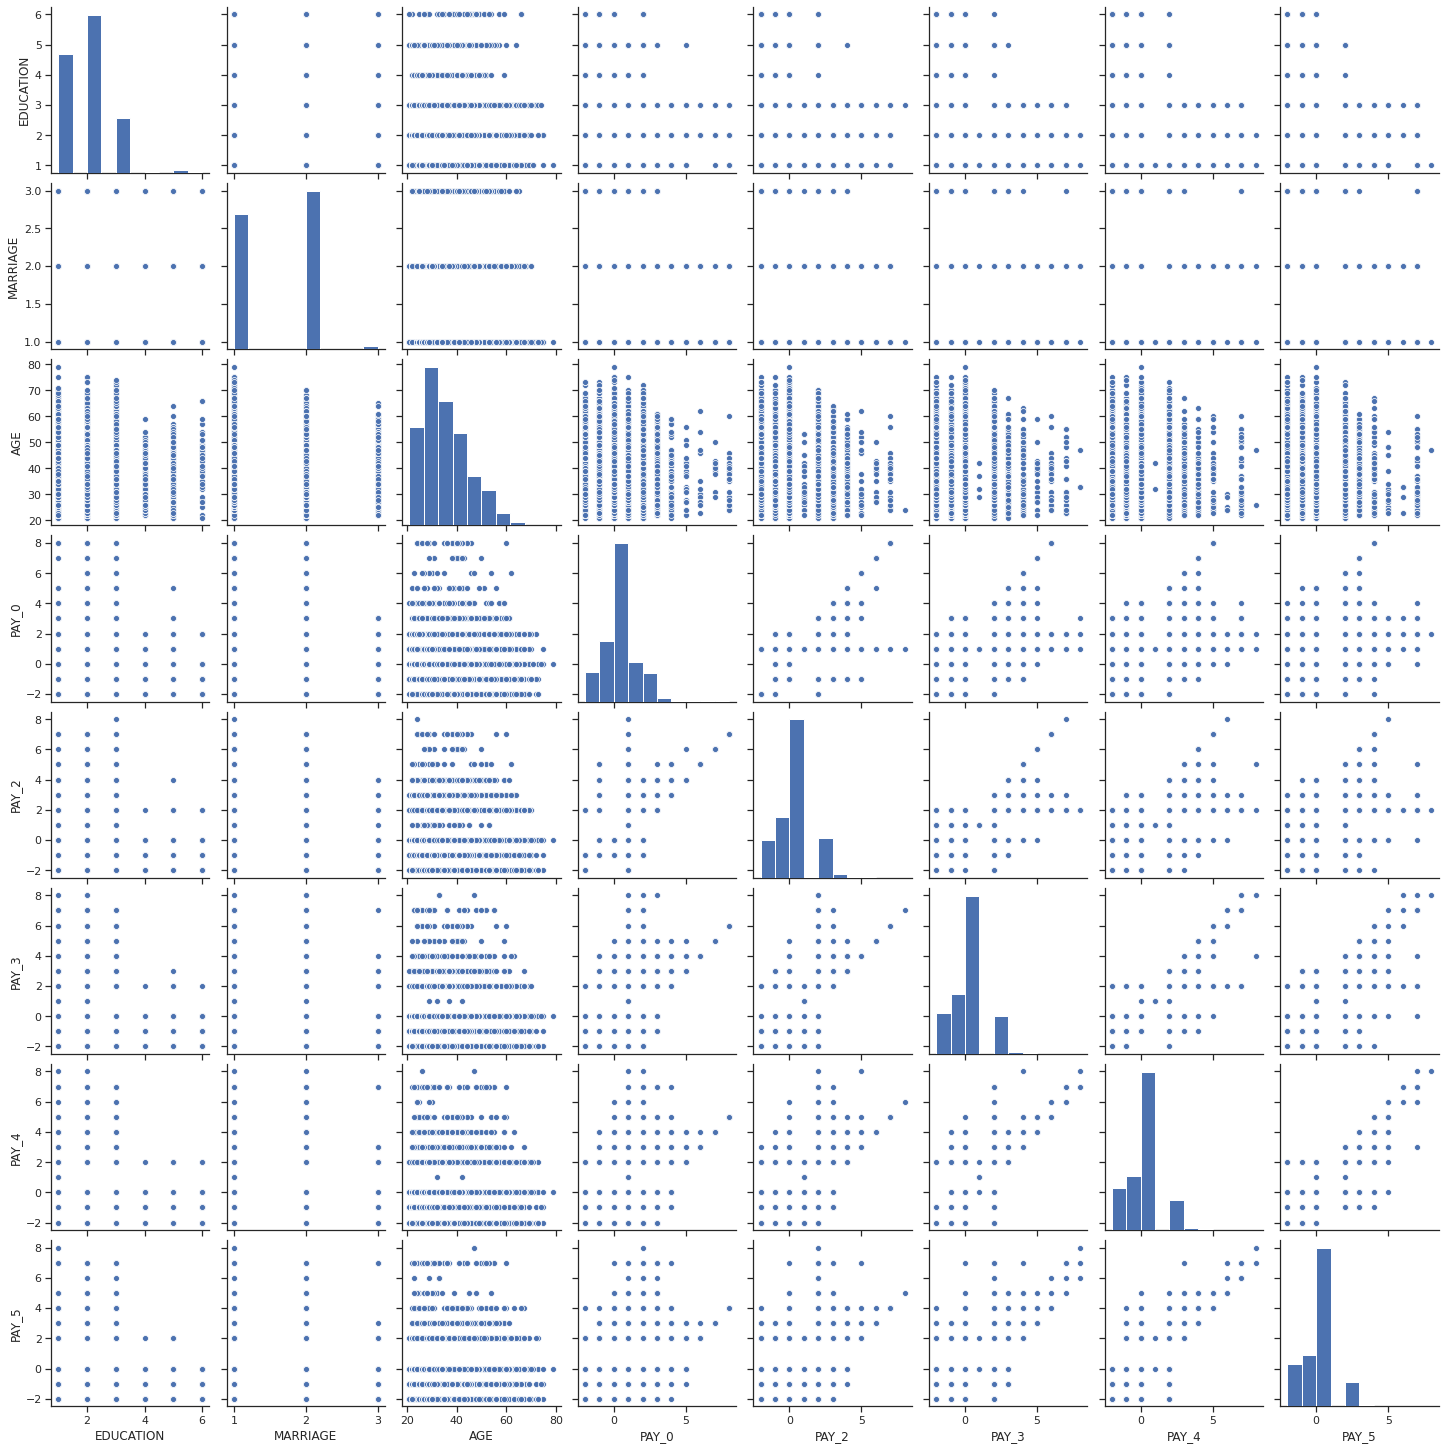

In [35]:
# Matrix plot
import seaborn as sns; sns.set(style="ticks", color_codes=True)
# get a few columns of data.
Data_small = Data_no_missing.iloc[:,2:10]
g = sns.pairplot(Data_small)

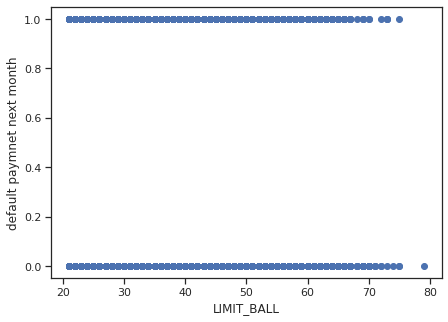

In [36]:
# Plot 'DEFAULT'(y) vs 'AGE'(x).
# Here you see why any one feature is not a good predictor of default.
import matplotlib.pyplot as plt

x=Data_no_missing['AGE']
y=Data_no_missing['DEFAULT']

fig = plt.figure(figsize=(7,5))
plt.scatter(x,y)
plt.xlabel('LIMIT_BALL')
plt.ylabel('default paymnet next month')
plt.show()

# With any columns in Data as X, there's not clear way to predict Y.

In [37]:
# Import packages
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.utils import resample                     # downsample the dataset
from sklearn.model_selection import train_test_split   # split data into training and testing sets
from sklearn.preprocessing import scale                # scale and center data
from sklearn.svm import SVC                            # this will make a support vector machine for classification

from sklearn.model_selection import GridSearchCV       # this wil do cross validation
from sklearn.metrics import confusion_matrix           # this creats a confusion matrix
from sklearn.metrics import plot_confusion_matrix      # draws a confusion matrix
from sklearn.decomposition import PCA                  # to perform PCA to plot the data

# Downsample the data
__SVMs__ are great with small datasets, but not so much with large ones. 
This dataset, while not huge, is big enough to take a long time to optimize with __Cross Validation__. So we'll downsample both categories - customers who did and did not default, to 1000 each.

In [38]:
# 29932 data points are too many for SVM.
len(Data_no_missing)

29932

In [39]:
# Let's get 1000 of each category.
# Split data into 2 dataframes - one for no default and one for default.
Data_no_default = Data_no_missing[Data_no_missing['DEFAULT']==0]
Data_default    = Data_no_missing[Data_no_missing['DEFAULT']==1]

In [40]:
# Downsample the dataset that did not default
Data_no_default_downsampled = resample(Data_no_default, 
                                       replace=False,      # Once selected for downsampling, don't select it again
                                       n_samples=1000,     # Give me 1000 of them
                                       random_state=42)    # Random number generator seed
len(Data_no_default_downsampled)

1000

In [41]:
# Downsample the dataset that did default
Data_default_downsampled = resample(Data_default, 
                                       replace=False,      # Once selected for downsampling, don't select it again
                                       n_samples=1000,     # Give me 1000 of them
                                       random_state=42)    # Random number generator seed
len(Data_default_downsampled)

1000

In [42]:
# Merge them
Data_downsample = pd.concat([Data_no_default_downsampled, Data_default_downsampled])

# Format Data Part 1: Split the Data into Dependent and Independent Variables

Now that we have taken care of the missing data, we are ready to start formatting the data for making a __SVM__.

The first step is to split the data into two parts:

1. The columns of data that we will use to make classifications
2. The column of data that we want to predict.

We will use the conventional notation of <b>X</b> (capital X) to represent the columns of data that we will use to make classifications and <b>y</b> (lower case y) to represent the thing we want to predict. In this cas, we want to predict __default__ (whether or not someone defaulted on a payment).

__NOTE__: The reason we deal with missing dta before splitting it into <b>X</b> and <b>y</b> is that if we remove rows, splitting after ensures that each row in 
<b>X</b> correctly correcponds with the appropriate value in <b>y</b>.

__ALSO NOTE__: In the code below we are using <code>copy()</code> to copy the data by value. By default, pandas uses copy by reference. Using <code>copy()</code> ensures that the original data <code>Data_downsample</code> is not modified when we modify <code>X</code> or <code>y</code>. In other words, if we make a mistake when we are formatting the columns for classification trees, we can just re-copy <code>Data_downsample</code>, rather than reload the original data and remove the missing values etc.

In [43]:
X = Data_downsample.drop('DEFAULT', axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
640,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4668,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
15975,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22927,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17500,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [44]:
y = Data_downsample['DEFAULT'].copy()
y.head()

640      0
4668     0
15975    0
22927    0
17500    0
Name: DEFAULT, dtype: int64

Now that we have created <b>X</b>, which has the data we want to use to make predictions,and <b>y</b>, which has the data we want to predict, we are ready to continue formatting <b>X</b> so that it is suitable for maing a __SVM__.

# Format the Data Part 2: One-Hot Encoding

Now that we have split the data frame into two pieces, <code>X</code>, which contains the data we will use to make, or predict, classifications, and <code>y</code>, which contains the known classifications in our training dataset, we need to take a closer look at the variables in <code>X</code>. The list below tells us what each variable represents and the type of data (<b>Int</b> or <b>Categorical</b>) it should contain:


- **LIMIT_BALL**, The amount of available credit **Integer**


- **SEX, Category**
    - 1 = male
    - 2 = female


- **EDUCATION, Category**
    - 1 = graduate school
    - 2 = university
    - 3 = high school
    - 4 = others


- **MARRIAGE, Category**
    - 1 = Married
    - 2 = Single
    - 3 = Other


- **AGE, Integer**


- **PAY_**, When the last 6 bills were payed, **Category**
    - -1 = Paid on time
    - 1 = Payment delayed by 1 month
    - 2 = Payment delayed by 2 months
    <br>...</br>
    - 8 = Payment delayed by 8 months
    - 9 = Payment delayed by 9 or more months


- **BILL_AMT**, What the last 6 bills were, **Integer**


- **PAY_AMT**, How much the last payments were, **Integer**


- **DEFAULT**, Whether or not a person defaulted on the next payment, **Category**
    - 0 = Did not default
    - 1 = Defaulted


So it looks like **SEX, EDUCATION, MARRIAGE**, and **PAY_** are supposed to be categorical and need to be modified. This is because, while **scikit learn SVM** natively support continuous data, like **LIMIT_BAL** and **AGE**, they do not natively support categorical data, like **MARRIAGE**, which contains <b>3</b> different categories. Thus, in order to use categorical data with **scikit learn SVM**, we have to use a trick that converts a column of categorical data into multiple columns of binary values. This trick is called **One-Hot Encoding**.

At this point you may be wondering, "what's wrong with treating categorical data like continuous data?" To answer that question, let's look at an example: For the **MARRIAGE** column, we have 3 options:

   1. Married
   2. Single
   3. Other

If we treated these values, 1, 2, and 3, like continuous data, then we would assume that 3, which means "Other" is ore similar to 2, which means "Single", than it is to 1, which means "Married." That means the support vector machine would be more likely to cluster the people with 3s and 2s together than the people with 3s and 1s together. In contrast, if we treat these numbers like categorical data, then we treat each one as a separate category that is no more or less similar to any of the other categories. Thus, the likelihood of clustering people with 3s with 2s is the same as clustering 3s with 1s. and that approach is more reasonable.


**NOTE**: There are many different ways to do **One-Hot Encoding** in Python. Two of the more popular methods are <code>ColumnTransformer()</code> (from **scikit-learn**) and <code>get_dummies()</code> (from **pandas**), and the both methods have pros and cons. <code>ColumnTransformer()</code> has a very cool feature where it creates a persistent function that can validate data that you get in the future. For example, if you build your **SVM** using a categorical variable **favorite color** that has **red, blue**, and **green** options, the <code>ColumnTransformer()</code> can remember those options and later on when your **SVM** is being used in a production system, if someone says their favorite color is **orange**, then <code>ColumnTransformer()</code> can throw an error or handle the situation in some other nice way. THe downside of <code>ColumnTransformer()</code> is that it turns your data into an array and looses all of the columns names, making it harder to verify that your usage of <code>ColumnTransformer()</code> worked as you intended it to. In contrast, <code>get_dummies()</code> leaves your data in a dataframe and retains the column names, making it much easier to verify that it worked as intended. However, it does not have the persistent behavior that <code>ColumnTransformer()</code> has. So, for the sake of learning how **One-Hot Encoding** works, I prefer to use <code>get_dummies()</code>. However, once you are comfortable with **One-Hot Encoding**, I encourage you to investigate using <code>ColumnTransformer()</code>.


First, before we commit to converting columns with **One-Hot Encoding**, let's just see what happens when we convert **MARRIAGE** without saving the results. This will make it easy to see how <code>get_dummies()</code> works.


In [45]:
pd.get_dummies(X, columns=['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
640,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,1,0,0
4668,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,1,0,0
15975,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,1,0,0
22927,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,0,1,0
17500,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,1,0,0


As we can see in the printout above, <code>get_dummies()</code> puts all of the columns it does not process on the left side and it puts **MARRIAGE** on the right side. It also splits **MARRIAGE** into <b>3</b> columns, just like we expected. **MARRIAGE_1** is <code>1</code> for any person that had a <b>1</b> for **MARRIAGE** and <code>0</code> for all other customers. **MARRIAGE_2** is <code>1</code> for any person that had a <b>2</b> for **MARRIAGE** and <code>0</code> for all other customers. Lastly **MARRIAGE_3** is <code>1</code> for any person that had a <b>3</b> for **MARRIAGE** and <code>0</code> for all other customers.

Now that we see how <code>get_dummies()</code> works, let's use it on the categorical columns and save the result.

**NOTE**: In a real situation (not a tutorial like this), you should verify all 5 of these columns to make sure they only contain the accepted categories.

In [46]:
X_encoded = pd.get_dummies(X, columns=['SEX',
                                       'EDUCATION',
                                       'MARRIAGE',
                                       'PAY_0',
                                       'PAY_2',
                                       'PAY_3',
                                       'PAY_4',
                                       'PAY_5',
                                       'PAY_6'])
X_encoded

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
640,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4668,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
15975,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22927,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17500,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0
14931,20000,28,8814,10167,21774,10707,10539,10757,1500,1200,...,0,0,0,1,0,0,0,0,0,0
9250,70000,26,23790,23880,24843,25338,25461,26008,1425,1388,...,0,0,0,1,0,0,0,0,0,0
8054,30000,33,29574,26663,27731,56359,28847,13030,28000,2336,...,0,0,0,1,0,0,0,0,0,0
15069,290000,36,215472,222699,213253,126952,103575,56564,11000,9500,...,0,0,0,1,0,0,0,0,0,0
9465,70000,26,35666,18116,18397,17262,24921,0,5000,17831,...,0,0,0,1,0,0,0,0,0,0


# Format the Data Part 3: Centering and Scaling

The **Radial Basis Function (RBF)** that we are using with our **SVM** assumes that the data are centered and scaled. In other words, each column should have a mean value = 0 and a standard deviation = 1. So we need to do this to both the training and testing datasets.

**NOTE**: We split the data into training and testing datasets and then scale them separately to avoid **Data Leakage**. **Data Leakage** occurs when information about the training dataset corrupts or influences the testing dataset.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled  = scale(X_test)

# Build a Preliminary SVM

At long last, the data is correctly formatted formaking a **SVM**.

In [48]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

OK, we've built a **SVM** for classification. Let's see how it performs on the **Testing Dataset** and draw a **Confusion Matrix**.

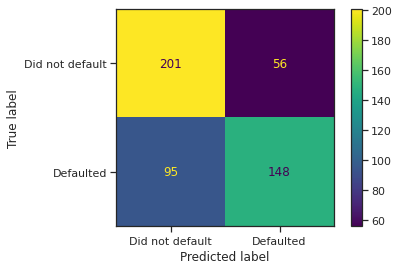

In [49]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled,
                      y_test, 
                      values_format='d',
                      display_labels=['Did not default', 'Defaulted'])

In the confusion matrix, we see that of the **257** people that did not default, **201 (79%)** were correctly classified. And of the **243** people that defaulted, **148 (61%)** were correctly classified. So the **SVM** was not awesome. So let's try to improve predictions using **Cross Validation** to optimize the parameters.

# Optimize Parameters with Cross Validation and GridSearchCV()

Optimizing a **SVM** is all about finding the best value for **gamma**, and, potentially, the regularization parameter, <b>C</b> (https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html). So let's ee if we can find better parameters values using cross validation in hope that we  can improve the accuracy with the **Testing Dataset**.

Since we have two parameters to optimze, we will use <code>GridSearchCV()</code>. We specify a bunch of potential values for **gamma** and <b>C</b>, and <code>GridSearchCV()</code> tests all possible combinations of the parameters for us.

In [50]:
param_grid = [
        {'C': [0.5, 1, 10, 100], # NOTE: Values for C must be >0
         'gamma' : ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
         'kernel': ['rbf']
        }
]
# NOTE: we are including C=1 and gamme='scale' as possible choices since they are the default values.

optimal_params = GridSearchCV(SVC(),
                              param_grid,
                              cv=5,               # number of folds
                              scoring='accuracy', # (accuracy is default scoring) Slightly improved, but hardly!!! C=1, gamma='sacle'
                              ## https://scikit-learn.org/stable/modules/model_evaluation.html
                              verbose = 0         # NOTE: If you want to see what Grid Search is doing, set verbose=2

)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


And we see that the ideal value for <code>C</code> is **100**, which means we will use regularization, and the ideal value for <code>gamma</code> is **0.001**.

# Building, Evaluating, Drawing and Interpreting the Final SVM

Now that we have the ideal values for <code>C</code> and <code>gamma</code> we can build the final **SVM**.

In [51]:
clf_svm = SVC(random_state=42, C=100, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

Now let's draw another confusion matrix to see if the optimized SVM does better.

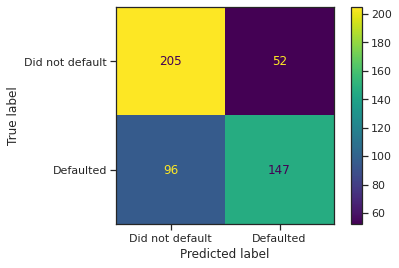

In [52]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled,
                      y_test, 
                      values_format='d',
                      display_labels=['Did not default', 'Defaulted'])

And the results from the *optimized* **SVM** are just a little bit better than before. <b>4</b> more people were correctly classified as not defaulting and only <b>1</b> more person was *incorrectly* classified as defaulting.

In other words, the **SVM** pretty good straight out of the box without much optimization. This makes **SMV** a great, quick and dirty method for relatively small datasets.

**NOTE**: Although classification with this dataset and an **SVM** is not awesome, it may be better than other mehtods. We'd have to compare to find out.

The last thing we are going to do is draw a support vector machine decision boundary and discuss how to interpret it.

The first thing we need to do is count the nubmer of columns in <b>X</b>:

In [53]:
len(Data_downsample.columns)

24

So we see that there are **24** features, or columns, in <b>X</b>. This is a problem because it would require a 24-dimensional graph, one dimension perfeature used to make predictions, to plot the data in its raw form. If we wanted to, we could just pick two features at random to use as x and y-axes on our graph, but instead, we will use **PCA (Principla Component Analysis)** to combine the <b>24</b> features into <b>2</b> orthogonal meta-features that we can use as axes for a graph.

However, before we shrink the graph, let's first determine how accurate the shrunken graph will be. if it's relatively accurate, than it makes sense to draw the 2-Dimensional graph. If not, the shrunken graph will not be very useful. We can determine the accuracy of the graph by drawing something called a **scree plot**.

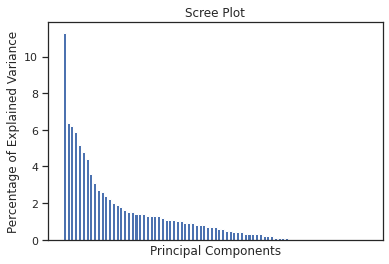

In [54]:
pca = PCA()     # NOTE: By default, PCA() centers the data, but not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(axis   = 'x',         # changes apply to the x-axis
                which  = 'both',      # both major and minor ticks are affected
                bottom = False,       # ticks along the bottom edge are off
                top    = False,       # ticks along the top edge are off
                labelbottom = False)  # labels along the bottom edge are off
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

The scree plot shows that the first principal component, PC1, accounts for a relatively alrge amount of variation in the raw data, and this m eans that it will be a good candidate for the x-axis in the 2-dimensional graph. However, PC2 is not much different from PC3 or PC4, which doesn't bode well for dimension reduction. Since we don't have a choice, let's go with it, but don't be surprised if the final graph looks funky.

Now we will draw the PCA graph. **NOTE**: This code is quite technical, but we don't have to type it in and there are comments that explain each step. First, let's optimze and SVM fit to PC1 and PC2.

In [55]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

# NOTE:
# PC1 contains the x-axis coordinates of the data after PCA
# PC2 contains the y-axis coordinates of the data after PCA

# Now center and scale the PCs...
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

# Now we optimize the SVM fit to the x and y-axis coordinates of the data after PCA dimension reduction...
param_grid = [
        {'C': [1, 10, 100, 1000],
         'gamma' : ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
         'kernel': ['rbf']
        }
]
# NOTE: we are including C=1 and gamme='scale' as possible choices since they are the default values.

optimal_params = GridSearchCV(SVC(),
                              param_grid,
                              cv=5,               # number of folds
                              scoring='accuracy', # (accuracy is default scoring) Slightly improved, but hardly!!! C=1, gamma='sacle'
                              ## https://scikit-learn.org/stable/modules/model_evaluation.html
                              verbose = 0         # NOTE: If you want to see what Grid Search is doing, set verbose=2

)

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


Now that we have the optimal values for <code>C</code> and <code>gamma</code>, let's draw the graph:

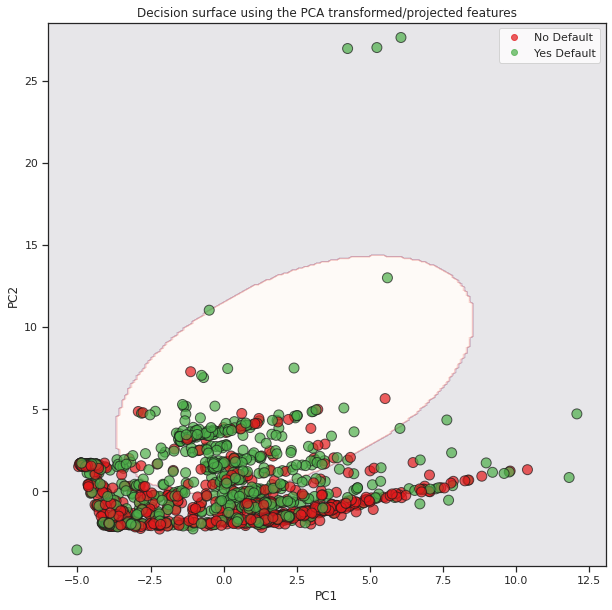

In [56]:
clf_svm = SVC(random_state=42, C=1000, gamma=0.001)
clf_svm.fit(pca_train_scaled, y_train)

# Transform the test dataset with the PCA...
X_test_pca = pca.transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

# Now create a matrix of points that we can use to show the decision regions.
# The matrix will be a little bit larger than the transformed PCA points so that we can plot all of the PCA points
# on it wihtout them being on the edge
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

# Now we will classify ever point in that matrix with the SVM.
# Points on one side of the classification boundary will get 0, and points on the other side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
# Right now, Z is just a long array of lots of 0s and 1s, which reflect how each point in the mesh was classified.
# We use reshape() so that each classification (0 of 1) corresponds to a specific point in the matrx.
Z = Z.reshape(xx.shape)

fis, ax = plt.subplots(figsize=(10,10))
# Now we will use contourf() to draw a filled contour plot using the matrix values and classifications.
# The contours will be filled according to the predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.1)

# Now create custom colors for the actual data points
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
# Now draw the actual data points - these will be colored by their known (not predicted) classifications
# NOTE: setting alpha=0.7 lets us see if we are covering up a point
# scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test,
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train,
                     cmap=cmap,
                     s=100,
                     edgecolors='k',
                     alpha=0.7)

# Now create a legend
legend = ax.legend(scatter.legend_elements()[0],
                   scatter.legend_elements()[1],
                   loc='upper right')
legend.get_texts()[0].set_text('No Default')
legend.get_texts()[1].set_text('Yes Default')

# Now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision surface using the PCA transformed/projected features')
# plt.savefig('svm_default.png')
plt.show()

The poink part of the graph is the area where all datapoints will be rpedicted to have not *defaulted*. The yellow part of the graph is the area where all datapoints will be predicted to *have defaulted*. The dots are datapoints in the training dataset and are color coded by their known classifications: red is for those that did not default and green is for those that *defaulted*.

**NOTE**: The results are shown with the training data, not the testing data dn thus, do not match the confusion matrices taht we generated. Also, remember that for this picture, we only fir the SVM to the first two principal components instead of all the data, and thus, this is only an approximation of the true classifier. Lastly, because the scree plot showed that PC2 was not very different from PC3 or PC4, this is not a very good approximation.